In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/NIAS/Dados/titanic'


Mounted at /content/drive


In [ ]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

seed = np.random.seed(0)

In [ ]:
df_test = pd.read_csv(f'{path}/test.csv')
df_train = pd.read_csv(f'{path}/train.csv')

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Variável contínua : _Parch_

Variáveis discretas : _PassengerId, Pclass, Age, SibSp, Survived_

In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train_numeric = df_train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]


In [ ]:
df_test_numeric = df_test[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch',
        'Fare']]

In [ ]:
df_train_numeric = df_train_numeric.dropna(subset=['Age'])

In [ ]:
df_test_numeric = df_test_numeric.fillna(0.0)

In [ ]:
rotulos = ["0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 - 70", "70 - 80"]
df_train_numeric.loc[:,"Intervalo de Idades"] = pd.cut(df_train_numeric['Age'], bins=8, labels=rotulos)
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          714 non-null    int64   
 1   Survived             714 non-null    int64   
 2   Pclass               714 non-null    int64   
 3   Age                  714 non-null    float64 
 4   SibSp                714 non-null    int64   
 5   Parch                714 non-null    int64   
 6   Fare                 714 non-null    float64 
 7   Intervalo de Idades  714 non-null    category
dtypes: category(1), float64(2), int64(5)
memory usage: 45.7 KB


/tmp/ipython-input-976200193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_graph_interval = df_train_numeric.groupby('Intervalo de Idades')['Survived'].sum().reset_index()
/tmp/ipython-input-976200193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


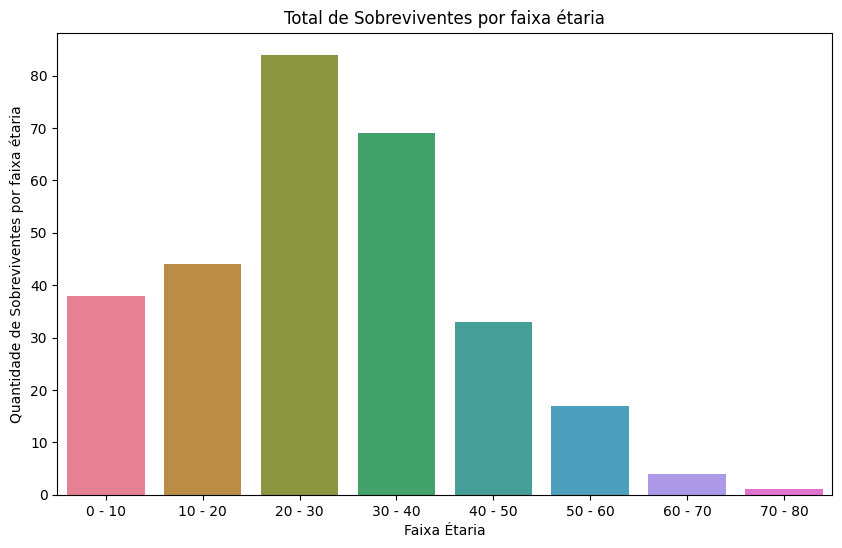

In [ ]:
df_graph_interval = df_train_numeric.groupby('Intervalo de Idades')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_interval['Intervalo de Idades'],
    y = df_graph_interval['Survived'],
    data=df_graph_interval,
    palette='husl'
)


plt.title("Total de Sobreviventes por faixa étaria")
plt.xlabel("Faixa Étaria")
plt.ylabel("Quantidade de Sobreviventes por faixa étaria")
plt.show()

/tmp/ipython-input-1873141501.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


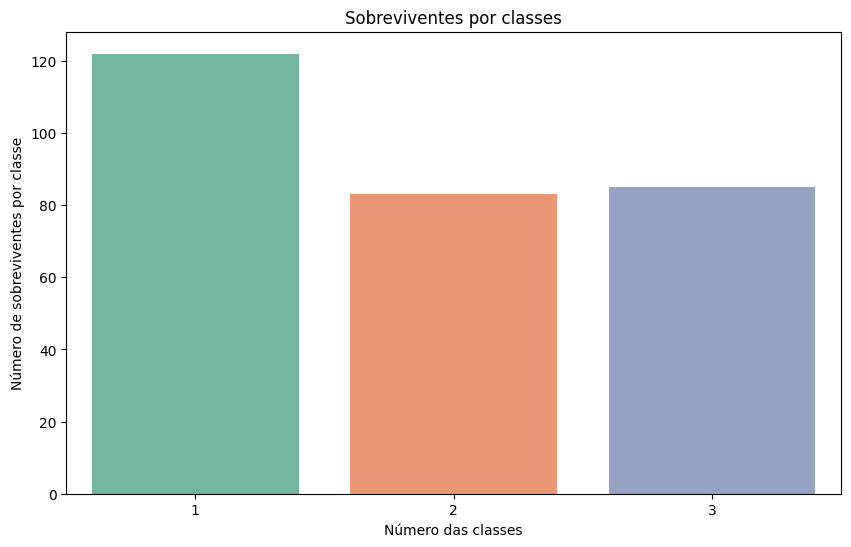

In [ ]:
df_graph_class = df_train_numeric.groupby('Pclass')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_class['Pclass'],
    y = df_graph_class['Survived'],
    data=df_graph_class,
    palette="Set2"
)

plt.title("Sobreviventes por classes")
plt.xlabel("Número das classes")
plt.ylabel("Número de sobreviventes por classe")
plt.show()

/tmp/ipython-input-1111806522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


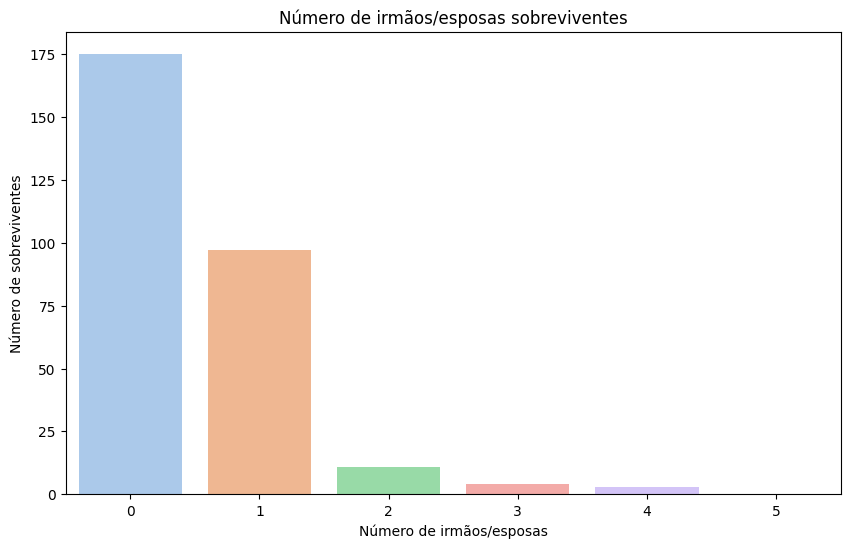

In [ ]:
df_graph_siblings = df_train_numeric.groupby('SibSp')['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x=df_graph_siblings['SibSp'],
    y=df_graph_siblings['Survived'],
    data=df_graph_siblings,
    palette='pastel'
)

plt.title("Número de irmãos/esposas sobreviventes")
plt.xlabel("Número de irmãos/esposas")
plt.ylabel("Número de sobreviventes")
plt.show()

/tmp/ipython-input-1819193420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


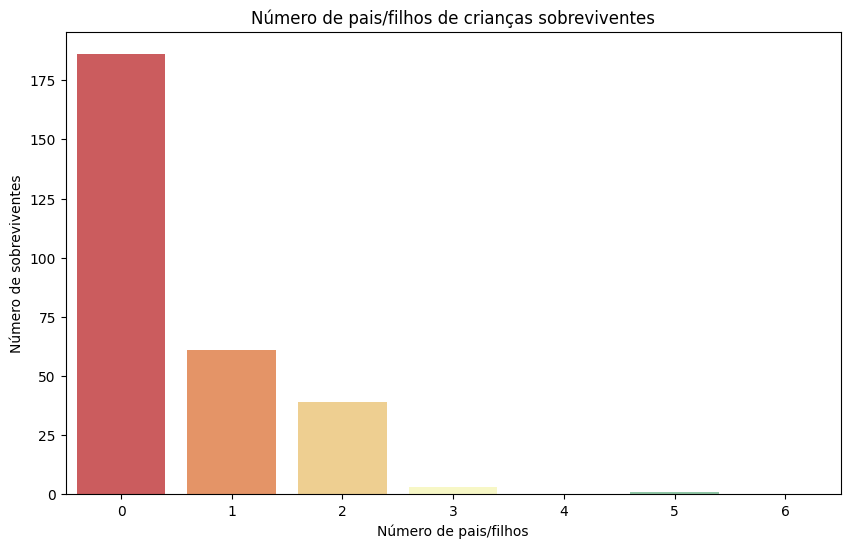

In [ ]:
df_graph_parents = df_train_numeric.groupby("Parch")['Survived'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    x = df_graph_parents["Parch"],
    y = df_graph_parents["Survived"],
    data=df_graph_parents,
    palette='Spectral'
)

plt.title("Número de pais/filhos de crianças sobreviventes")
plt.xlabel("Número de pais/filhos")
plt.ylabel("Número de sobreviventes")
plt.show()

Separação entre treino e validação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x = df_train_numeric.drop(columns=['PassengerId','Survived'])
y = df_train_numeric['Survived']

x_train,x_valid,y_train,y_valid = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train = pd.get_dummies(x_train)
x_valid = pd.get_dummies(x_valid)

Treinamento e validação do modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)

acuracia = accuracy_score(y_valid,y_pred)
print(f'A acurácia é de {acuracia :.4f}')

A acurácia é de 0.6923


A acurácia do modelo treinado é de 69,23%, que para esse problema é uma boa acurácia inicial. Porém ela pode ser melhorada

In [48]:
X_train_full = df_train_numeric.drop(columns=['PassengerId','Survived'])
Y_train_full = df_train_numeric['Survived']

X_test = df_test_numeric.drop(columns='PassengerId')

X_train_full = pd.get_dummies(X_train_full)
X_train_full, X_test = X_train_full.align(X_test, join='left', axis=1, fill_value=0)
X_test = pd.get_dummies(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_full,Y_train_full)
y_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': df_test_numeric['PassengerId'],
    'Survived' : y_pred
})

submission.to_csv('submission.csv', index=False)
